In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
stocks = pd.read_excel('C:/Users/USER/Desktop/amazon_sales_dataset.xlsx')

# 데이터 확인
stocks.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,0.43,4,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",0.90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,0.53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,0.61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


category
Electronics              3138057.00
Home&Kitchen             1044115.81
Computers&Accessories     381720.62
OfficeProducts              9349.00
Car&Motorbike               2339.00
MusicalInstruments          1276.00
Health&PersonalCare          899.00
HomeImprovement              674.00
Toys&Games                   150.00
Name: discounted_price, dtype: float64


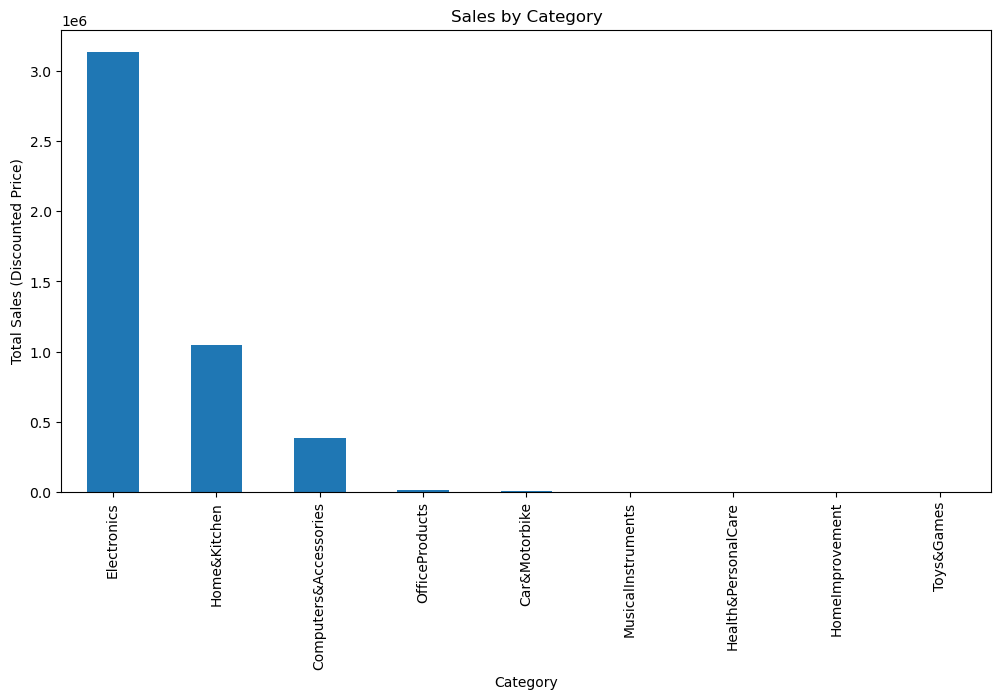

In [34]:
# 'discounted_price' 열에서 통화 기호 ₹ 제거 후 숫자로 변환
stocks['discounted_price'] = pd.to_numeric(stocks['discounted_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')

# 'category' 열에서 카테고리가 여러 개인 경우 첫 번째 카테고리만 사용
stocks['category'] = stocks['category'].str.split('|').str[0]

# 카테고리별로 할인가(매출) 합계 계산
category_sales = stocks.groupby('category')['discounted_price'].sum().sort_values(ascending=False)

# 카테고리별 매출 결과 출력
print(category_sales)

# 카테고리별 매출 시각화 (막대 그래프)
category_sales.plot(kind='bar', figsize=(12, 6), title='Sales by Category')
plt.ylabel('Total Sales (Discounted Price)')
plt.xlabel('Category')
plt.show()


Sales percentage by category:
category
Car&Motorbike             0.051086
Computers&Accessories     8.337095
Electronics              68.537772
Health&PersonalCare       0.019635
Home&Kitchen             22.804357
HomeImprovement           0.014721
MusicalInstruments        0.027869
OfficeProducts            0.204190
Toys&Games                0.003276
Name: discounted_price, dtype: float64


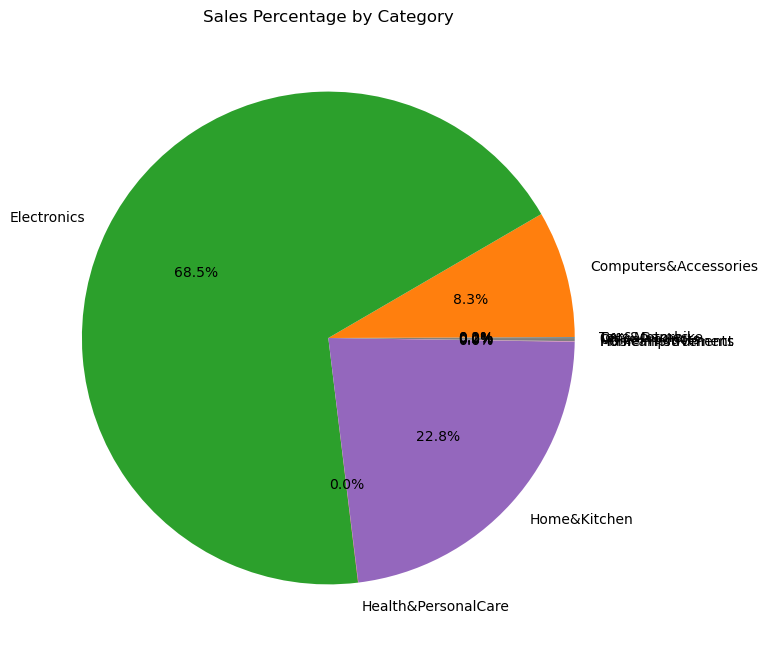


Top 5 categories by sales percentage:
category
Electronics              68.537772
Home&Kitchen             22.804357
Computers&Accessories     8.337095
OfficeProducts            0.204190
Car&Motorbike             0.051086
Name: discounted_price, dtype: float64


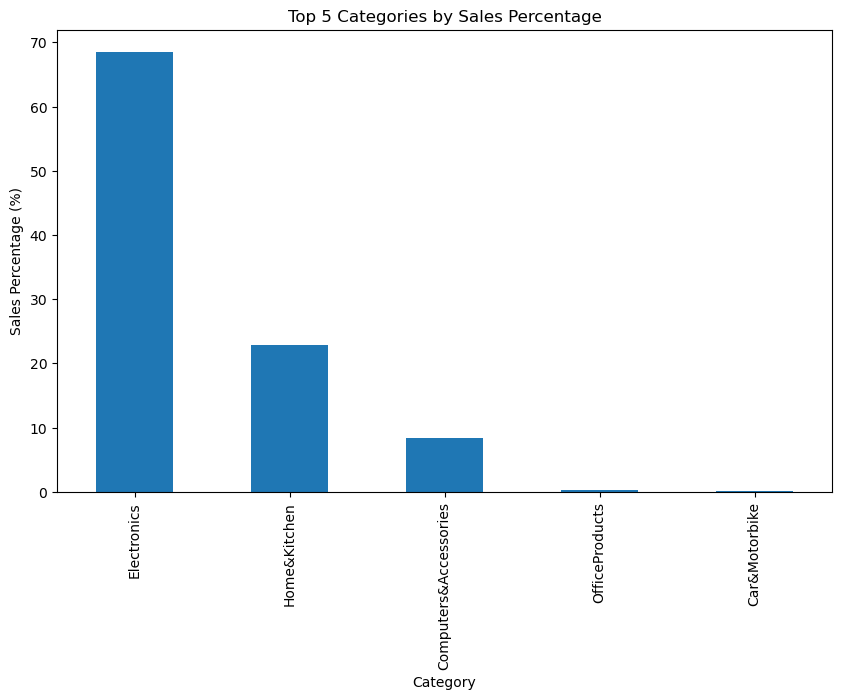

In [35]:
# 전체 매출 계산
total_sales = stocks['discounted_price'].sum()

# 카테고리별 매출 계산
category_sales = stocks.groupby('category')['discounted_price'].sum()

# 카테고리별 매출 비중 계산
category_sales_percentage = (category_sales / total_sales) * 100

print("Sales percentage by category:")
print(category_sales_percentage)

# 카테고리별 매출 비중을 시각화
category_sales_percentage.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Sales Percentage by Category')
plt.ylabel('')  # y축 라벨 제거 (파이 차트에서는 필요 없음)
plt.show()

# 상위 몇 개 카테고리가 전체 매출에 미치는 영향 파악
top_categories = category_sales_percentage.sort_values(ascending=False).head(5)
print("\nTop 5 categories by sales percentage:")
print(top_categories)

# 상위 카테고리 시각화 (막대 그래프)
top_categories.plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Categories by Sales Percentage')
plt.ylabel('Sales Percentage (%)')
plt.xlabel('Category')
plt.show()